# Sales Data Analytics & Predictions

## Mission Statement

**This notebook is based off of the excel file (`Sales Calls.xlsx`) by Tom Padden.**

The background data is a collection of sales data recorded over a period of 10 years.

- No access to this data will be permitted.
- New data may be contributed at a later date.

The purpose of this program is to run a sales forcast based on your personal business metrics: 

  - `n_reps`: The number of sales reps.
  - `calls_per_day`: The number of calls made per sales rep.
  - `avg_sale`: The average price per sale.
  - `prob_contact`: The probability of making contact with a customer.
  - `prob_sale`: The probability of making a sale with a customer.
  - `call_hrs`: The total number of hours on the phone per day.

### Import Selected Features

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

### Gathering Business Metrics

In [3]:
# Initializing Business Metrics
n_reps = 1
calls_per_day = 20
avg_sale = 3702
prob_contact = .15
prob_sale = .1
call_hrs = 4

### Measured Tracking

In [4]:
# Calculating outputs
# Calls
call_mins = call_hrs * 60 / calls_per_day
calls_per_hr = 60 / call_mins
calls_per_wk = calls_per_day * 5
calls_per_mth = calls_per_wk * 4
calls_per_qtr = calls_per_mth * 3
calls_per_yr = calls_per_qtr * 4

# Contacts
contacts_per_day = calls_per_day * prob_contact * n_reps

# Sales
sales_per_day = contacts_per_day * prob_sale * n_reps
sales_per_wk = sales_per_day * 5 * n_reps
sales_per_mth = sales_per_wk * 4 * n_reps
sales_per_qtr = sales_per_mth * 3 * n_reps
sales_per_yr = sales_per_qtr * 4 * n_reps

# Revenue
rev_per_qtr = sales_per_qtr * avg_sale
rev_per_yr = sales_per_yr * avg_sale

# Report Outputs
if n_reps > 1:
    print("\nEach day: Sales Reps will each spend", int(call_mins), "mins per call, making", int(calls_per_hr), "calls per hour")
else:
    print("\nEach day: Sales Rep will spend", int(call_mins), "mins per call, making", int(calls_per_hr), "calls per hour")
print("and will reach", int(contacts_per_day), "customers while making", round(sales_per_day, 2), "sales per day!")

# Simple prediction: Quarterly
print("\nQuarterly Prediction:", int(calls_per_day), "calls per day will yeild", int(calls_per_qtr), "calls,", int(sales_per_qtr), "sales, and $", "{:,}".format(round(rev_per_qtr, 2)), "in quarterly revenue!")

# Simple prediction: Yearly
print("\nYearly Prediction:", int(calls_per_day), "calls per day will yeild", int(calls_per_yr), "calls,", int(sales_per_yr), "sales, and $", "{:,}".format(round(rev_per_yr, 2)), "in anual revenue!")


Each day: Sales Rep will spend 12 mins per call, making 5 calls per hour
and will reach 3 customers while making 0.3 sales per day!

Quarterly Prediction: 20 calls per day will yeild 1200 calls, 18 sales, and $ 66,636.0 in quarterly revenue!

Yearly Prediction: 20 calls per day will yeild 4800 calls, 72 sales, and $ 266,544.0 in anual revenue!


### DataFrame Construction

In [5]:
# Create new DataFrame
df = pd.DataFrame(data={'metric': ['calls_per_day', 'call_mins', 'calls_per_hr', 'calls_per_wk', 'calls_per_mth', 'calls_per_qtr', 'calls_per_yr', 'contacts_per_day', 'sales_per_day', 'sales_per_wk', 'sales_per_mth', 'sales_per_qtr', 'sales_per_yr', 'rev_per_qtr', 'rev_per_yr']})

# Add sample data
df['sample'] = [int(calls_per_day), int(call_mins), int(calls_per_hr), int(calls_per_wk), int(calls_per_mth), int(calls_per_qtr), int(calls_per_yr), int(contacts_per_day), round(sales_per_day, 2), round(sales_per_wk, 2), round(sales_per_mth, 2), round(sales_per_qtr, 2), round(sales_per_yr, 2), round(rev_per_qtr, 2), round(rev_per_yr, 2)]

# Print DataFrame
df

,metric,sample
0,calls_per_day,20.0
1,call_mins,12.0
2,calls_per_hr,5.0
...,...,...
12,sales_per_yr,72.0
13,rev_per_qtr,66636.0
14,rev_per_yr,266544.0


## Data Visualization

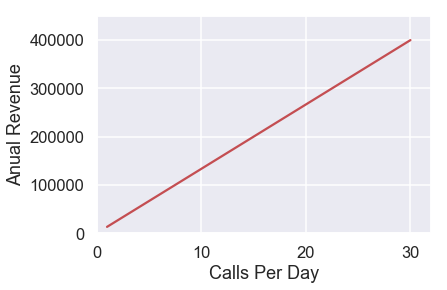

In [6]:
# Create Graph
f, ax = plt.subplots()
plt.xlabel('Calls Per Day'); plt.xlim([0, 32]);
plt.ylabel('Anual Revenue'); plt.ylim([0, 450000]);

# Create Linear Model *needs more data and transposed df*
#a1, b1 = np.polyfit(df['calls_per_day'], rev_per_yr, 1)
a1 = 13327.2
b1 = 0

# Plot Linear Prediction
x = np.arange(1, 31)
y = a1 * x + b1
plt.plot(x, y, '-r')